In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDCClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# To plot Matplotlib and sns Inlinely
%matplotlib inline

In [5]:
# Loading Dataset
wine = pd.read_csv('winequality-red.csv')

In [6]:
# Preprocessing Data
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [7]:
label_qualilty = LabelEncoder()

In [8]:
wine['quality'] = label_qualilty.fit_transform(wine['quality'])


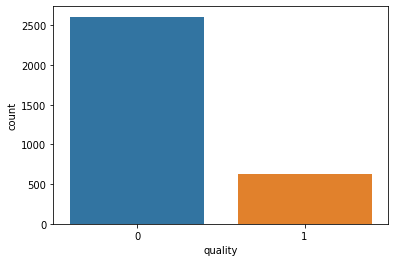

In [9]:
sns.countplot(wine['quality'])

In [10]:
# Now seperate the dataset as response variable and feature variable
X = wine.drop('quality', axis=1)
y = wine['quality']

In [11]:
# Train and Test spllitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [12]:
# Applying Standard scaling to get optimized results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##### We gonna Look At 3 Different Setups

## Random Forest Classifier

In [13]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [14]:
# Let's see how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       513
           1       0.81      0.98      0.89       135

    accuracy                           0.95       648
   macro avg       0.90      0.96      0.93       648
weighted avg       0.96      0.95      0.95       648

[[483  30]
 [  3 132]]


In [15]:
# 483 When Predicting Bad Wines
# 3 WHen predicting Good Wines

## SVM Classifier

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [85]:
# Let's see how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       513
           1       0.81      0.98      0.89       135

    accuracy                           0.95       648
   macro avg       0.90      0.96      0.93       648
weighted avg       0.96      0.95      0.95       648

[[483  30]
 [  3 132]]


In [86]:
# SVM is better on smaller numbers
# SVM is the fastest and easiest when coming to ease

## Neural Network

In [87]:
# You can work with huge amounts of data
# Also you can work with text dtypes

In [88]:
# Multi Layer Preciptron Classifier
mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [89]:
# Let's see how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       513
           1       0.81      0.98      0.89       135

    accuracy                           0.95       648
   macro avg       0.90      0.96      0.93       648
weighted avg       0.96      0.95      0.95       648

[[483  30]
 [  3 132]]


In [90]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_mlpc)
cm

0.9490740740740741

In [94]:
wine.tail()

,fixed acidity,velatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3235,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
3236,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0
3237,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,0
3238,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,0
3239,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.39,0.57,9.5,1


In [95]:
Xnew = [[7.8, 0.58, 0.02, 2.0, 0.073, 9, 18, 0.9968, 3.39, 0.57, 9.5]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([1])